**The Sparks Foundation- Data Science & Business Analytics Internship**





Task Submitted by -**PALAK GANGWAR**

**MACHINE LEARNING**:Gives computers the ability to learn  without being explicitly programmed.

**TASK 1 -Prediction using Supervised Machine Learning**

Objective: To predict the percentage of a student based on a number of hours they study by using the Linear Regression Supervised Machine Learning 

**Steps in implementing Linear Regression Model**
 

1.   Importing the libraries and the dataset 
2.   Scaling the dataset
3.   Creating the testsplit and train partitions
4.   Implementing the Linear Regression model using Sckit-Learn
5.   Generating predicitions over the test set
6.   Evaluating the model






**STEP 1:Importing the libraries and dataset**

Importing the Libraries

In [ ]:
import pandas as pd                    
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
#plt.style.use('dark_background')
import warnings   # To ignore any warnings warnings.filterwarnings("ignore")

Importing the Dataset

In [ ]:
data="http://bit.ly/w-data"
data1=pd.read_csv(data)


**Target variabale: Scores**

**SKIMMIMG OVER  THE  DATASET**

In [ ]:
data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data1.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data1['Scores'].head(10)

0    21
1    47
2    27
3    75
4    30
5    20
6    88
7    60
8    81
9    25
Name: Scores, dtype: int64

**More details about dataset**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Check no of rows and columns**

In [ ]:
data1.shape

(25, 2)

**Descriptive Statistics**

In [ ]:
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**To check the outliers**

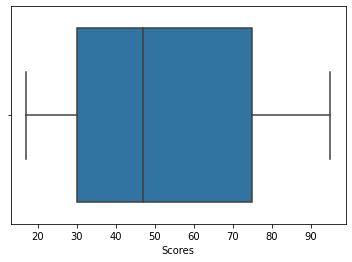

In [ ]:
import seaborn as sns
sns.boxplot(x=data1['Scores'])


**Correlation**

In [ ]:
data1['Scores'].corr(data1['Hours'])

0.9761906560220887

In [ ]:
np.corrcoef(data1['Scores'],data1['Hours'])

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

**Unique value**

In [ ]:
data1['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [ ]:
data1['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

**Visualizing the Dataset**

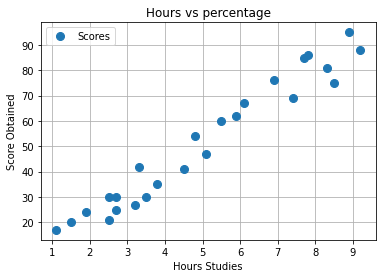

In [ ]:
data1.plot(x='Hours',y='Scores',style='o',markersize=8)
plt.title('Hours vs percentage')
plt.xlabel('Hours Studies')
plt.ylabel('Score Obtained')
plt.grid()
plt.show()

**STEP 2**

**Preparation of Dataset**

In [ ]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,1].values

In [ ]:
print(x.shape)

(25, 1)


In [ ]:
print(y.shape)

(25,)


**Step 3**

**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)

(17, 1)


In [ ]:
print(x_test.shape)

(8, 1)


**Step 4**

**Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression.coef_

array([9.78856669])

**Visualizing the model**

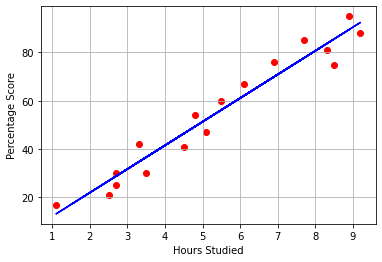

In [ ]:
l=regression.coef_*x+regression.intercept_
plt.scatter(x_train,y_train,color='red')
plt.plot(x,l,color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

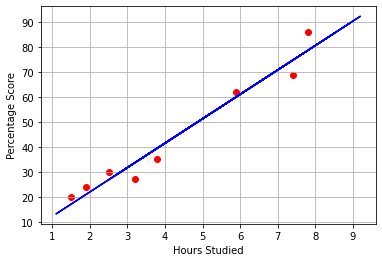

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regression.predict(x_train),color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [ ]:
predictions=regression.predict(x_test)
regression.score(x_test,y_test)

0.9568211104435257

In [ ]:
print("Intercept")
print(regression.intercept_)

Intercept
2.3708153823418883


In [ ]:
print("Coefficent:")
print(regression.coef_)

Coefficent:
[9.78856669]


**Step 5**

**Making the prediction**

In [ ]:
y_pred=regression.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [ ]:
hour=9.25
newpred=regression.predict([[hour]])
print(newpred[0])

92.91505723477056


The person who studies for 9.25 hours the predicted score is 92.91

**Step 6**

**Evaluating the model**

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

4.419727808027651


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9568211104435257
